# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 9999999

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [1]:
# import required library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


df1 = pd.read_csv('task2a.csv')                 # read first file
print('information about task2a.csv\n' + '-'*5)
df1.info()                                      # view summary of the read data

df2 = pd.read_csv('task2b.csv')                 # read second file
print('\ninformation about task2b.csv\n' + '-'*5)
df2.info()                                      # view summary of the read data

merged = pd.merge(df1, df2, on='region')        # merge both dataframes
print('\ninformation about the merged dataframe\n' + '-'*5)
merged.info()                                   # view summary of the mearged data

information about task2a.csv
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    51 non-null     int64  
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_to_the_right           51 non-null     float64
dtypes: fl

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [2]:
merged = merged.dropna()                                          # remove entries with missing columns
merged = merged.drop('share_voters_voted_to_the_right', axis=1)   # remove 'share_voters_voted_to_the_right' column
merged.info()     # Information on data in the cleaned frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    47 non-null     int64  
 1   median_household_income                   47 non-null     int64  
 2   share_unemployed_seasonal                 47 non-null     float64
 3   share_population_in_metro_areas           47 non-null     float64
 4   share_population_with_high_school_degree  47 non-null     float64
 5   share_non_citizen                         47 non-null     float64
 6   share_white_poverty                       47 non-null     float64
 7   gini_index                                47 non-null     float64
 8   share_non_white                           47 non-null     float64
 9   avg_biascrimes_per_100k                   47 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 4.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes

In [3]:
merged.head()   # taking a look at the data

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,2.397986


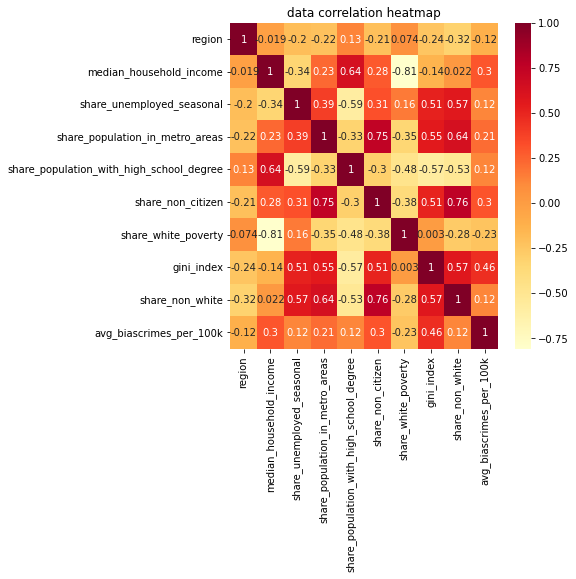

In [4]:
# inspecting the correlation of measures in the dataset
plt.figure(figsize=(6,6))
sns.heatmap(
  merged.corr(), 
  annot=True, 
  cmap=plt.cm.YlOrRd
)
plt.title('data correlation heatmap')
plt.show()

In [5]:
# generate pearson's correlation coefficient matrix for household income vs biasvrimes
corr_matrix = merged[['median_household_income', 'avg_biascrimes_per_100k']].corr()
corr_matrix


,median_household_income,avg_biascrimes_per_100k
median_household_income,1.000000,0.295819
avg_biascrimes_per_100k,0.295819,1.000000


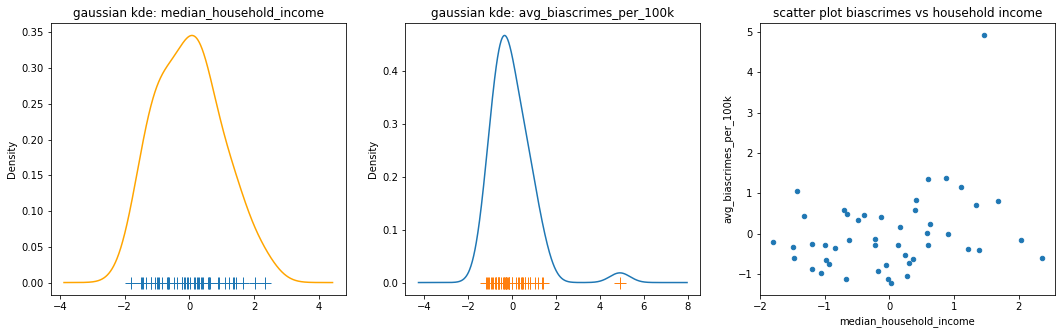

In [6]:
# define center-scaling method for data points
standardize = lambda x: (x-x.mean()) / x.std()

# obtain and cwnter-scale data points
x1 = standardize(merged['median_household_income'])
x2 = standardize(merged['avg_biascrimes_per_100k'])

# investigate biascrimes vs household income
f, ax = plt.subplots(1, 3, figsize=(18,5))        # define figure and sublot grid

x1.plot.kde(ax=ax[0], color='orange')             # gaussian kde of household income using Scott's bw_method
ax[0].plot(x1, np.zeros(x1.shape), '+', ms=12)    # rug plot 
ax[0].set_title(f'gaussian kde: {x1.name}')

x2.plot.kde(ax=ax[1])                             # gaussian kde of household income using Scott's bw_method
ax[1].plot(x2, np.zeros(x2.shape), '+', ms=12)    # rug plot
ax[1].set_title(f'gaussian kde: {x2.name}')

pd.DataFrame({x1.name: x1, x2.name: x2}).plot.scatter(
  x=x1.name,
  y=x2.name,
  ax=ax[2]
)
ax[2].set_title('scatter plot biascrimes vs household income')

plt.show()

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

In [7]:
# Define null and alternative hypotheses
H0 = 'null hypothesis'                # Replace with actual Null Hypothesis
H1 = 'alternative hypothesis'         # Replace with actual Alternative Hypothesis
alpha = 0.01                          # Adjust to required significance level

# Uncomment to select the test you want.
# stat, p = stats.spearmanr(x1, x2)     # Spearman's Rank Correlation test
# stat, p = stats.pearsonr(x1, x2)      # Pearson's Correlation Coefficient test
stat, p = stats.kendalltau(x1, x2)    # Kendall's Rank Correlation test

if p > alpha:
  print(H0)                           # Failed to reject Null hypothesis
else:
  print(H1)                           # Null hypothesis rejected 



null hypothesis


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes

In [8]:
# generate correlation matrix for biascimes and uerbanization
corr_matrix = merged[['share_population_in_metro_areas', 'avg_biascrimes_per_100k']].corr()
corr_matrix

,share_population_in_metro_areas,avg_biascrimes_per_100k
share_population_in_metro_areas,1.000000,0.209463
avg_biascrimes_per_100k,0.209463,1.000000


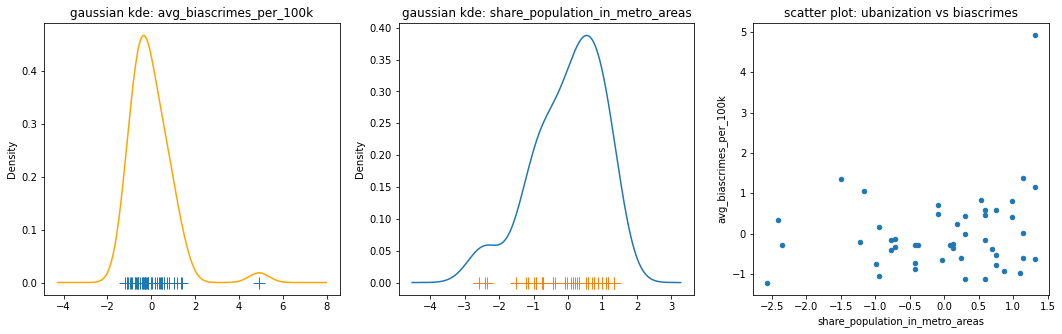

In [9]:
# obtain standardize values for metro population
x3 = standardize(merged.share_population_in_metro_areas)

# investigate urbanization vs biascrimes
f, ax = plt.subplots(1, 3, figsize=(18,5))        # define figure and sublot grid

x2.plot.kde(ax=ax[0], color='orange')
ax[0].plot(x2, np.zeros(x2.shape), '+', ms=12)    # gaussian kde of biasecrimes using Scott's bw_method
ax[0].set_title(f'gaussian kde: {x2.name}')       # rug plot

x3.plot.kde(ax=ax[1])
ax[1].plot(x3, np.zeros(x3.shape), '+', ms=12)    # gaussian kde of urbanization using Scott's bw_method
ax[1].set_title(f'gaussian kde: {x3.name}')       # rug plot

pd.DataFrame({x2.name: x2, x3.name: x3}).plot.scatter(
  x=x3.name,
  y=x2.name,
  ax=ax[2]
)
ax[2].set_title('scatter plot: ubanization vs biascrimes')

plt.show()

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

In [10]:
# Define null and alternative hypotheses
H0 = 'null hypothesis'                # Replace with actual Null Hypothesis
H1 = 'alternative hypothesis'         # Replace with actual Alternative Hypothesis
alpha = 0.01                          # Adjust to required significance level

# Uncomment to select the test you want.
# stat, p = stats.spearmanr(x1, x2)     # Spearman's Rank Correlation test
# stat, p = stats.pearsonr(x1, x2)      # Pearson's Correlation Coefficient test
stat, p = stats.kendalltau(x1, x2)    # Kendall's Rank Correlation test

if p > alpha:
  print(H0)                           # Failed to reject Null hypothesis
else:
  print(H1)                           # Null hypothesis rejected 

null hypothesis


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


add text here

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>